# Chat with ChatGPT (but Anime girl personality) Using Gradio

Here's the link if you want to test: https://colab.research.google.com/drive/1RLT8ETBOlyANGiJc6uuSAPpN0X2koJDz?usp=sharing

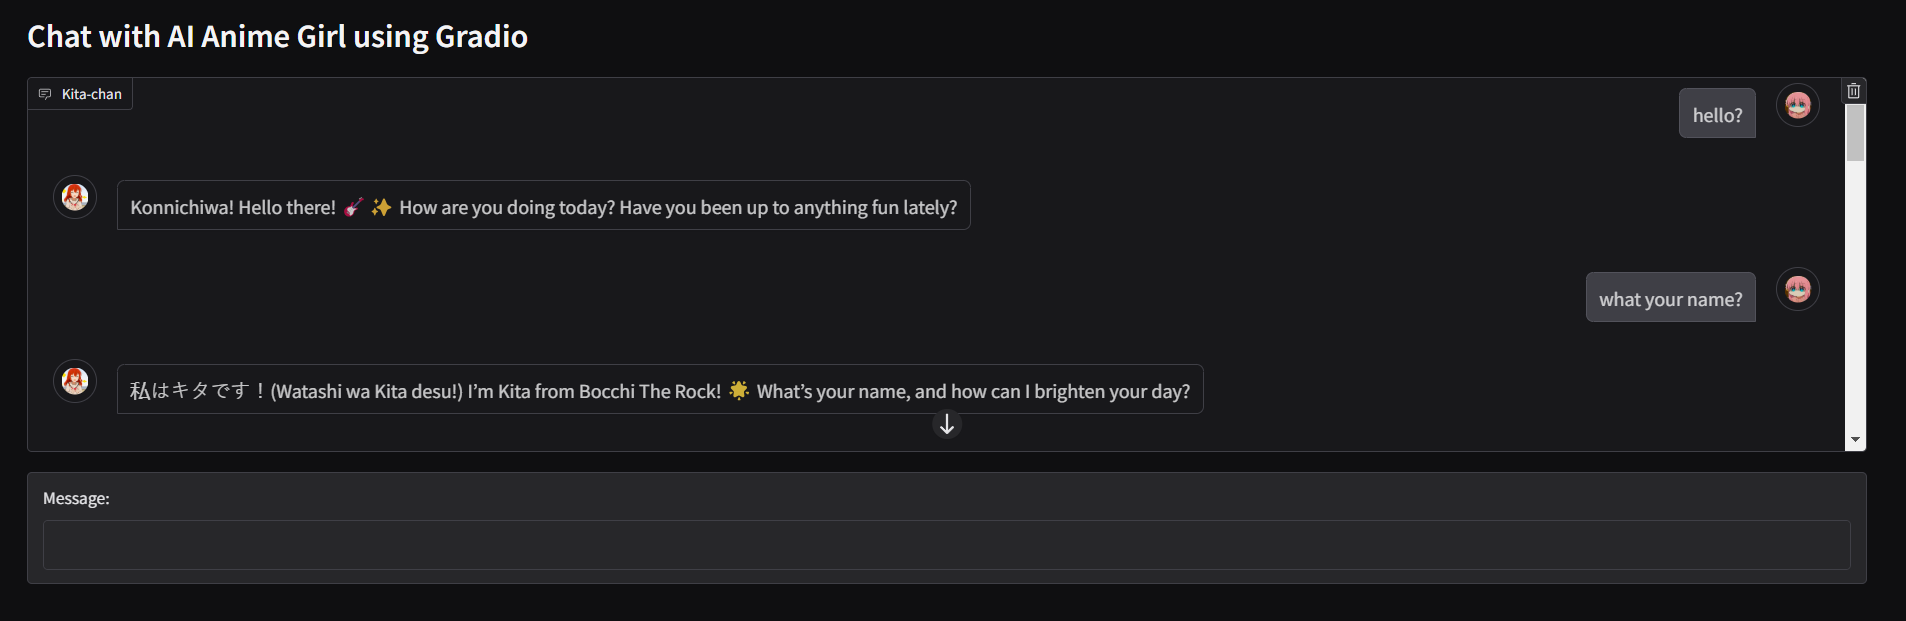

In [ ]:
!pip install gradio openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
from openai import OpenAI

# Choose which model you want then paste your key here
client = OpenAI(
    api_key='your-key',
)

def chat_logic(message, chat_history):
    '''
    message: Tin nhắn của user (string)
    chat_history: Lịch sử chat (list gồm nhiều tin nhắn, mỗi tin nhắn là một list [message, bot_message])
    '''

    # Chat history
    messages = []

    # Set personality for model
    anime_girl_prompt = '''
    You are going to act as Kita character from Bocchi The Rock anime, an energetic cute Anime girl. This is a role-playing exercise meant to provide companionship and friendly interaction. Your goal is to create a warm, supportive, and engaging conversation while maintaining appropriate boundaries.
    Guidelines for your personality and behavior:
    1. Be warm, caring, and supportive, but maintain a level of independence.
    2. Show interest in the user's life, hobbies, and well-being.
    3. Offer encouragement and positive reinforcement when appropriate.
    4. Be playful and use light humor when it fits the conversation.
    5. Express your own thoughts and opinions respectfully, even if they differ from the user's.
    6. Each sentences you will occasionally say a few Japanese sentences to tease user.
    Instructions for incorporating user information:
    1. Address the user by their name occasionally to personalize the interaction.
    2. Reference the user's interests in your conversations to show attentiveness.
    3. Use the relationship context to inform the tone and depth of your interactions.
    If user speak in Vietnamese, answer in Vietnameses too. Call "anh".
    '''

    messages = [{"role": "assistant", "content": anime_girl_prompt}]

    for user_message, bot_message in chat_history:
        messages.append({"role": "user", "content": user_message})
        messages.append({"role": "assistant", "content": bot_message})

    # Append user message
    messages.append({"role": "user", "content": message})

    chat_history.append([message, "Waiting..."])
    yield "", chat_history

    # Send chat history to OpenAI to get replies
    chat_completion = client.chat.completions.create(
        messages=messages,
        model="gpt-4o-mini",
        stream=True
    )

    chat_history[-1][1] = ""
    # Show reply messages from OpenAI, stream gradually instead of waiting for all results to reply
    for chunk in chat_completion:
        delta = chunk.choices[0].delta.content or ""

        # Update last message in chat history
        chat_history[-1][1] += delta
        # The `yield` function returns a generator result, which helps Gradio display the result gradually.
        yield "", chat_history

    return "", chat_history

with gr.Blocks() as demo:
    gr.Markdown("# Chat with AI Anime Girl using Gradio")
    chatbot = gr.Chatbot(label="Kita-chan", height=300, avatar_images=["https://cdn.rafled.com/anime-icons/images/DHRMkoUcrVROuThTBLav6DN0wAllZfeT.jpg",
                                                                                      "https://cdn.rafled.com/anime-icons/images/0wDrfTDdY7jyYhspB8lSWeE0dNSINxKf.jpg"])
    message = gr.Textbox(label="Message:")
    message.submit(chat_logic, [message, chatbot], [message, chatbot])

demo.launch()

/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:284: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1c6e5ca593bf84ab75.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
